In [48]:
import pandas as pd


In [49]:
# Carregar o arquivo Excel global
file_path = 'WID-World_Inequality_Database_2012-2022/Per_adult_national_income_GLOBAL.xlsx'
data = pd.read_excel(file_path)

# Mostrar as primeiras linhas de todas as colunas
print("Primeiras linhas do conjunto de dados:")
print(data.head())

# Verificar as colunas para entender a estrutura
print("\nColunas no conjunto de dados:")
print(data.columns)


Primeiras linhas do conjunto de dados:
                Country  Year   dataValue
0  Antigua and Barbuda   2012  19105.7344
1  Antigua and Barbuda   2013  19215.6207
2  Antigua and Barbuda   2014  19711.0846
3  Antigua and Barbuda   2015  19029.5117
4  Antigua and Barbuda   2016  19489.7909

Colunas no conjunto de dados:
Index(['Country', 'Year', 'dataValue'], dtype='object')


In [50]:
# Agrupar por País e calcular a média de renda para o conjunto de dados global
average_income_data = data.groupby('Country')['dataValue'].mean().reset_index()

# Salvar as médias em um novo arquivo Excel
average_income_file = 'average_income_GLOBAL_2012-2022.xlsx'
average_income_data.to_excel(average_income_file, index=False)
print(f"\nMédias salvas em {average_income_file}")



Médias salvas em average_income_GLOBAL_2012-2022.xlsx


In [51]:
# Lista de caminhos de arquivos por continente
continents = ['AFRICA', 'AMERICAS', 'ASIA', 'EUROPE', 'OCEANIA']
relevant_countries = []

# Loop através de cada continente e realizar operações similares
for continent in continents:
    # Carregar o arquivo do continente
    continent_file_path = f'WID-World_Inequality_Database_2012-2022/Per_adult_national_income_{continent}.xlsx'
    continent_data = pd.read_excel(continent_file_path)

    # Agrupar por País e calcular a média de renda
    average_income_continent_data = continent_data.groupby('Country')['dataValue'].mean().reset_index()

    # Salvar as médias em um novo arquivo Excel
    average_income_continent_file = f'average_income_{continent}_2012-2022.xlsx'
    average_income_continent_data.to_excel(average_income_continent_file, index=False)
    print(f"Médias salvas em {average_income_continent_file}")

    # Extrair o país com o maior e o menor dataValue
    top_countries = average_income_continent_data.nlargest(1, 'dataValue')
    bottom_countries = average_income_continent_data.nsmallest(1, 'dataValue')

    # Adicionar à lista de países relevantes
    relevant_countries.append(top_countries)
    relevant_countries.append(bottom_countries)

# Combinar todos os países relevantes em um único DataFrame
final_relevant_countries = pd.concat(relevant_countries).reset_index(drop=True)

# Salvar os países relevantes finais em um arquivo Excel
relevant_income_file = 'relevant_income_data.xlsx'
final_relevant_countries.to_excel(relevant_income_file, index=False)
print(f"Dados finais de renda relevantes salvos em {relevant_income_file}")


Médias salvas em average_income_AFRICA_2012-2022.xlsx
Médias salvas em average_income_AMERICAS_2012-2022.xlsx
Médias salvas em average_income_ASIA_2012-2022.xlsx
Médias salvas em average_income_EUROPE_2012-2022.xlsx
Médias salvas em average_income_OCEANIA_2012-2022.xlsx
Dados finais de renda relevantes salvos em relevant_income_data.xlsx


In [52]:
# Carregar o arquivo de dados de renda relevantes
file_path = 'WID-World_Inequality_Database_2012-2022/relevant_income_data_rounded.xlsx'
data = pd.read_excel(file_path)

# Substituir vírgulas por pontos e converter para float
data['dataValue'] = data['dataValue'].astype(str).str.replace(',', '.').astype(float)

# Arredondar para zero casas decimais e converter para int
data['dataValue'] = data['dataValue'].round(0).astype(int)

# Preparar dados para os dados finais de renda
richest_average = data.nlargest(5, 'dataValue')['dataValue'].mean()
poorest_average = data.nsmallest(5, 'dataValue')['dataValue'].mean()

# Criar o DataFrame final
final_income_data = pd.DataFrame({
    'Country': ['Países de alta renda', 'Brasil', 'Países de baixa renda'],
    'dataValue': [richest_average, 14456, poorest_average]
})

# Converter dataValue para int antes de salvar
final_income_data['dataValue'] = final_income_data['dataValue'].astype(int)

# Salvar os dados finais de renda em um novo arquivo Excel
final_income_file = 'final_income_data.xlsx'
final_income_data.to_excel(final_income_file, index=False)

print(f"Dados finais de renda salvos em {final_income_file}")


Dados finais de renda salvos em final_income_data.xlsx


In [53]:
# Carregar o arquivo Excel original
file_path = 'World_Bank-2012-2042/Populations_estimates_and_projections_2012-2042.xlsx'
data = pd.read_excel(file_path)

# Imprimir as colunas para verificar seus nomes
print("Colunas no conjunto de dados:")
print(data.columns)

# Preparar um DataFrame vazio para armazenar os dados derretidos
melted_data = pd.DataFrame(columns=['Country', 'Year', 'dataValue'])

# Loop por cada coluna de ano e anexar os dados ao DataFrame melted_data
for year in range(2012, 2043):  # De 2012 a 2042
    # Verificar se a coluna do ano existe
    if year in data.columns:
        # Criar um DataFrame temporário para o ano atual
        temp_df = data[['Country', year]].copy()
        temp_df['Year'] = year  # Definir o ano
        temp_df.rename(columns={year: 'dataValue'}, inplace=True)  # Renomear a coluna do ano

        # Anexar ao DataFrame melted_data
        melted_data = pd.concat([melted_data, temp_df], ignore_index=True)
    else:
        print(f"A coluna para o ano {year} não existe no conjunto de dados.")

# Salvar o DataFrame reformulado em um novo arquivo Excel
output_file_path = 'World_Bank-2012-2042/melted_population_data.xlsx'
melted_data.to_excel(output_file_path, index=False)

print(f"Dados derretidos salvos em {output_file_path}")


Colunas no conjunto de dados:
Index([   'Country', 'Population',         2012,         2013,         2014,
               2015,         2016,         2017,         2018,         2019,
               2020,         2021,         2022,         2023,         2024,
               2025,         2026,         2027,         2028,         2029,
               2030,         2031,         2032,         2033,         2034,
               2035,         2036,         2037,         2038,         2039,
               2040,         2041,         2042],
      dtype='object')
Dados derretidos salvos em World_Bank-2012-2042/melted_population_data.xlsx


In [54]:
def process_data(households_file, individuals_file, households_output_file, individuals_output_file):
    # Carregar os conjuntos de dados
    households_data = pd.read_excel(households_file)
    individuals_data = pd.read_excel(individuals_file)

    # Converter dataValue para numérico, forçando erros para NaN
    households_data['dataValue'] = pd.to_numeric(households_data['dataValue'], errors='coerce')
    individuals_data['dataValue'] = pd.to_numeric(individuals_data['dataValue'], errors='coerce')

    # Definir países de alta e baixa renda
    high_income_countries = ['Mauritius', 'Australia', 'United States', 'Singapore', 'Luxembourg']
    low_income_countries = ['Burundi', 'North Korea', 'Solomon Islands', 'Haiti', 'Moldova']
    brazil_country = 'Brazil'

    # Processar dados de Famílias
    households_grouped = households_data.groupby(['Year', 'Country']).agg({'dataValue': 'mean'}).reset_index()

    # Calcular média para países de alta renda
    high_income_avg = households_grouped[households_grouped['Country'].isin(high_income_countries)]
    high_income_avg = high_income_avg.groupby('Year').agg({'dataValue': 'mean'}).reset_index()
    high_income_avg['Country'] = 'Países de alta renda'

    # Calcular média para países de baixa renda
    low_income_avg = households_grouped[households_grouped['Country'].isin(low_income_countries)]
    low_income_avg = low_income_avg.groupby('Year').agg({'dataValue': 'mean'}).reset_index()
    low_income_avg['Country'] = 'Países de baixa renda'

    # Manter os dados do Brasil
    brazil_data = households_grouped[households_grouped['Country'] == brazil_country]

    # Combinar todos os dados
    final_households_data = pd.concat([high_income_avg, low_income_avg, brazil_data], ignore_index=True)

    # Arredondar dataValue para 1 casa decimal
    final_households_data['dataValue'] = final_households_data['dataValue'].round(1)

    # Salvar os dados de famílias processados
    final_households_data.to_excel(households_output_file, index=False)

    # Processar dados de Indivíduos
    individuals_grouped = individuals_data.groupby(['Year', 'Country']).agg({'dataValue': 'mean'}).reset_index()

    # Calcular média para países de alta renda
    high_income_avg_individuals = individuals_grouped[individuals_grouped['Country'].isin(high_income_countries)]
    high_income_avg_individuals = high_income_avg_individuals.groupby('Year').agg({'dataValue': 'mean'}).reset_index()
    high_income_avg_individuals['Country'] = 'Países de alta renda'

    # Calcular média para países de baixa renda
    low_income_avg_individuals = individuals_grouped[individuals_grouped['Country'].isin(low_income_countries)]
    low_income_avg_individuals = low_income_avg_individuals.groupby('Year').agg({'dataValue': 'mean'}).reset_index()
    low_income_avg_individuals['Country'] = 'Países de baixa renda'

    # Manter os dados do Brasil
    brazil_data_individuals = individuals_grouped[individuals_grouped['Country'] == brazil_country]

    # Combinar todos os dados
    final_individuals_data = pd.concat(
        [high_income_avg_individuals, low_income_avg_individuals, brazil_data_individuals], ignore_index=True)

    # Arredondar dataValue para 1 casa decimal
    final_individuals_data['dataValue'] = final_individuals_data['dataValue'].round(1)

    # Salvar os dados de indivíduos processados
    final_individuals_data.to_excel(individuals_output_file, index=False)

# Definir caminhos dos arquivos
households_file = 'ITU_DataHub-2012-2022/Households_with_Internet_access_at_home.xlsx'
individuals_file = 'ITU_DataHub-2012-2022/Individuals_using_the_Internet.xlsx'
households_output_file = 'Processed_Households_Internet.xlsx'
individuals_output_file = 'Processed_Individuals_Internet.xlsx'

# Executar a função de processamento
process_data(households_file, individuals_file, households_output_file, individuals_output_file)


Esse foi o desenvolvimento inicial, para obter os seguintes arquivos, necessários para o alcançar o objetivo do projeto: 'Processed_Households_Internet.xlsx', 'Processed_Individuals_Internet.xlsx', 'final_income_data.xlsx', 'melted_population_data.xlsx'.

Objetivo do projeto:
Obter dois gráficos, um que apresenta 'Indivíduos usando a internet - Estimativas de 2012 a 2022 e projeções de 2023 a 2042', e outro que demonstra 'Famílias com acesso à internet em casa - Estimativas de 2012 a 2022 e projeções de 2023 a 2042'.

# A seguir, a seção de análise exploratória de dados dos arquivos mencionados na célula markdown acima.

In [55]:
import pandas as pd


In [56]:
def carregar_arquivo(arquivo):
    return pd.read_excel(arquivo)


In [57]:
def descrever_variaveis(df):
    print("Descrição das variáveis:")
    print("=" * 50)
    
    for col in df.columns:
        print(f"Análise da coluna: {col}")
        print("------------------------------")
        
        # Descrição básica
        print(f"Número de exemplares: {df[col].count()}")
        print(f"Quantidade de NAs na coluna {col}: {df[col].isna().sum()}")
        
        if pd.api.types.is_numeric_dtype(df[col]):
            print(f"Valor máximo: {df[col].max()}")
            print(f"Valor mínimo: {df[col].min()}")
            print(f"Variância: {df[col].var()}")
            print(f"Desvio padrão: {df[col].std()}")
            
            # Análise da distribuição
            distribution = df[col].value_counts(normalize=True)
            print("Distribuição:")
            print(distribution)
        else:
            print("Esta coluna não é numérica, não é possível calcular variância e desvio padrão.")
        
        print("\n")


In [58]:
dados_habitantes = carregar_arquivo("Processed_Households_Internet.xlsx")
dados_individuos = carregar_arquivo("Processed_Individuals_Internet.xlsx")
dados_renda = carregar_arquivo("final_income_data.xlsx")
dados_populacao = carregar_arquivo("World_Bank-2012-2042/melted_population_data.xlsx")


In [59]:
descrever_variaveis(dados_habitantes)
descrever_variaveis(dados_individuos)
descrever_variaveis(dados_renda)


Descrição das variáveis:
Análise da coluna: Year
------------------------------
Número de exemplares: 33
Quantidade de NAs na coluna Year: 0
Valor máximo: 2022
Valor mínimo: 2012
Variância: 10.3125
Desvio padrão: 3.2113081446662823
Distribuição:
Year
2012    0.090909
2013    0.090909
2014    0.090909
2015    0.090909
2016    0.090909
2017    0.090909
2018    0.090909
2019    0.090909
2020    0.090909
2021    0.090909
2022    0.090909
Name: proportion, dtype: float64


Análise da coluna: dataValue
------------------------------
Número de exemplares: 33
Quantidade de NAs na coluna dataValue: 0
Valor máximo: 92.4
Valor mínimo: 15.2
Variância: 599.9676704545456
Desvio padrão: 24.494237494858776
Distribuição:
dataValue
74.0    0.030303
26.2    0.030303
81.5    0.030303
83.2    0.030303
71.4    0.030303
66.7    0.030303
60.8    0.030303
53.9    0.030303
50.9    0.030303
49.6    0.030303
43.3    0.030303
39.6    0.030303
56.3    0.030303
57.1    0.030303
55.8    0.030303
50.7    0.030303
31.3

# Resumo das Descrições das Variáveis

# 1. Dados Populacionais

Coluna: Ano  
Número de Entradas: 33  
NAs: 0  
Valor Máximo: 2022  
Valor Mínimo: 2012  
Variância: 10,31  
Desvio Padrão: 3,21  
Distribuição: Distribuição uniforme ao longo dos anos (2012-2022).

Coluna: dataValue  
Número de Entradas: 33  
NAs: 0  
Valor Máximo: 92,4  
Valor Mínimo: 15,2  
Variância: 599,97  
Desvio Padrão: 24,49  
Distribuição: Vários valores com frequências específicas.

Coluna: País  
Número de Entradas: 33  
NAs: 0  
Descrição: Coluna não numérica, sem variância ou desvio padrão calculados.

# 2. Dados de Internet Individual

Coluna: Ano  
Número de Entradas: 33  
NAs: 0  
Valor Máximo: 2022  
Valor Mínimo: 2012  
Variância: 10,31  
Desvio Padrão: 3,21  
Distribuição: Distribuição uniforme ao longo dos anos (2012-2022).

Coluna: dataValue  
Número de Entradas: 33  
NAs: 0  
Valor Máximo: 94,6  
Valor Mínimo: 31,3  
Variância: 349,44  
Desvio Padrão: 18,69  
Distribuição: Vários valores com frequências específicas.

Coluna: País  
Número de Entradas: 33  
NAs: 0  
Descrição: Coluna não numérica, sem variância ou desvio padrão calculados.

# 3. Dados Finais de Renda

Coluna: País  
Número de Entradas: 3  
NAs: 0  
Descrição: Coluna não numérica, sem variância ou desvio padrão calculados.

Coluna: dataValue  
Número de Entradas: 3  
NAs: 0  
Valor Máximo: 72.140  
Valor Mínimo: 3.967  
Variância: 1.347.503.484,33  
Desvio Padrão: 36.708,36  
Distribuição: Número limitado de entradas com frequências.

# 4. Dados de Internet por Família

Coluna: País  
Número de Entradas: 341  
NAs: 0  
Descrição: Coluna não numérica, sem variância ou desvio padrão calculados.

Coluna: Ano  
Número de Entradas: 341  
NAs: 0  
Valor Máximo: 2042  
Valor Mínimo: 2012  
Variância: 80,24  
Desvio Padrão: 8,96  
Distribuição: Distribuição uniforme ao longo dos anos (2012-2042).

Coluna: dataValue  
Número de Entradas: 341  
NAs: 0  
Valor Máximo: 361.189.504  
Valor Mínimo: 530.946  
Variância: 1,16e+16  
Desvio Padrão: 107.811.251,55  
Distribuição: Ampla gama de valores.

# A seguir, a criação dos gráficos 'Indivíduos usando a internet - Estimativas de 2012 a 2022 e projeções de 2023 a 2042' e 'Famílias com acesso à internet em casa - Estimativas de 2012 a 2022 e projeções de 2023 a 2042'.

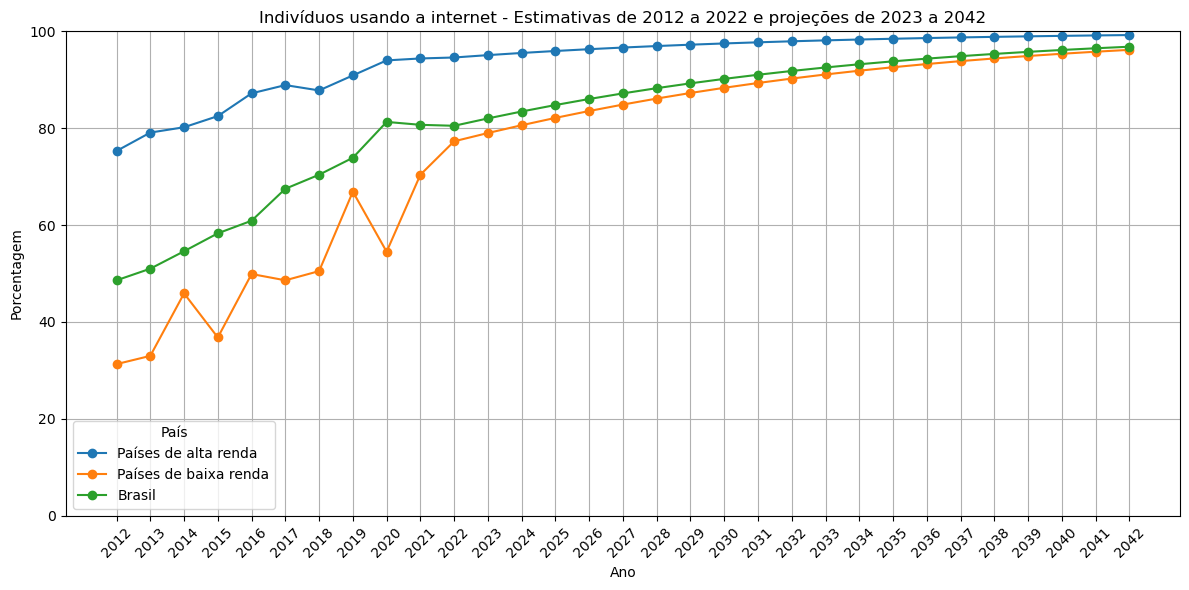

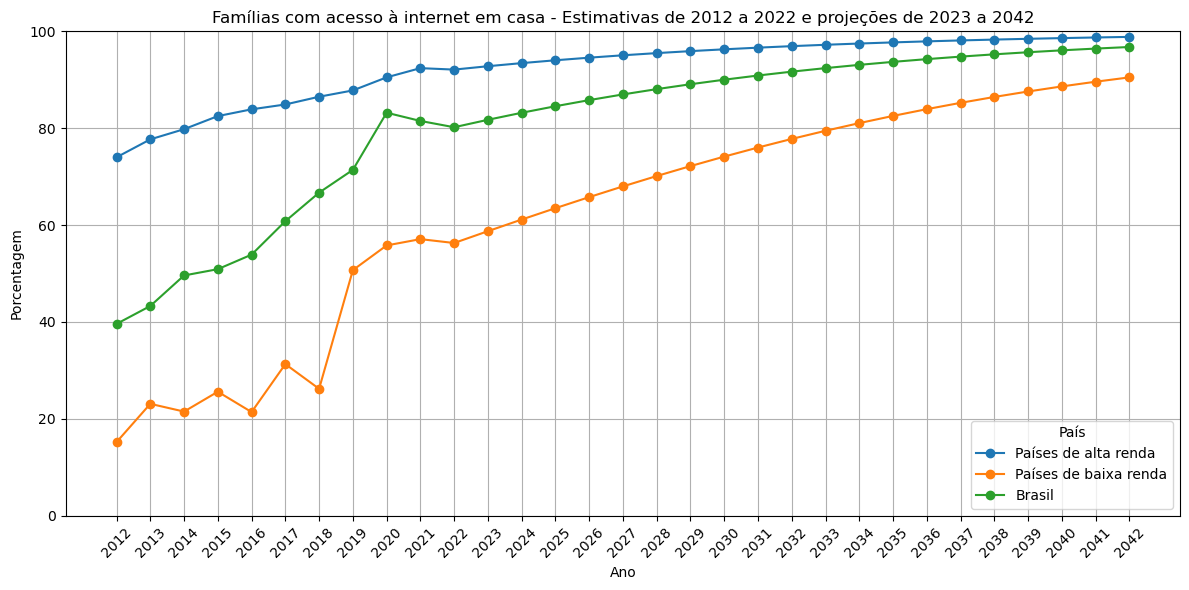

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os conjuntos de dados
individuals_df = pd.read_excel('Processed_Individuals_Internet.xlsx')
households_df = pd.read_excel('Processed_Households_Internet.xlsx')
population_df = pd.read_excel('World_Bank_Averages_Rounded.xlsx')

# Renomear países para melhor representação nos gráficos
country_translation = {
    'High Income Countries': 'Países de Alta Renda',
    'Brazil': 'Brasil',
    'Low Income Countries': 'Países de Baixa Renda'
}

# Traduzir nomes de países nos conjuntos de dados
individuals_df['Country'] = individuals_df['Country'].replace(country_translation)
households_df['Country'] = households_df['Country'].replace(country_translation)

def logistic_growth(current_value, max_value, growth_rate):
    return max_value / (1 + ((max_value / current_value) - 1) * np.exp(-growth_rate))

# Análise preditiva para indivíduos (dados históricos de 2012-2022)
historical_individuals = individuals_df[individuals_df['Year'] <= 2022]
years_future_individuals = np.arange(2023, 2043)

# Preparar dados futuros (análise preditiva)
future_individuals = []

for country in historical_individuals['Country'].unique():
    historical_values = historical_individuals[historical_individuals['Country'] == country]
    
    last_value = historical_values['dataValue'].iloc[-1]
    max_value = 100
    growth_rate = 0.1

    for year in years_future_individuals:
        predicted_value = logistic_growth(last_value, max_value, growth_rate)
        future_individuals.append({'Year': year, 'dataValue': predicted_value, 'Country': country})
        last_value = predicted_value  # Update for next prediction

# Criar um DataFrame para previsões futuras
future_individuals_df = pd.DataFrame(future_individuals)

# Combinar dados históricos e preditivos para indivíduos
combined_individuals_df = pd.concat([historical_individuals, future_individuals_df], ignore_index=True)

# Criar o primeiro gráfico
plt.figure(figsize=(12, 6))  # Elongated graph
for country in combined_individuals_df['Country'].unique():
    country_data = combined_individuals_df[combined_individuals_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['dataValue'], marker='o', label=country)

plt.title('Indivíduos usando a internet - Estimativas de 2012 a 2022 e projeções de 2023 a 2042')
plt.xlabel('Ano')
plt.ylabel('Porcentagem')
plt.xticks(np.arange(2012, 2043, 1), rotation=45)  # Rotate x-axis labels
plt.ylim(0, 100)  # Configurar limites do eixo y de 0 a 100
plt.legend(title='País')
plt.grid()
plt.tight_layout()
plt.savefig('Individuals_Using_Internet.png')  # Salvar o gráfico como uma imagem
plt.show()

# Análise preditiva para famílias (dados históricos de 2012-2022)
historical_households = households_df[households_df['Year'] <= 2022]
years_future_households = np.arange(2023, 2043)

# Preparar dados futuros (análise preditiva)
future_households = []

for country in historical_households['Country'].unique():
    historical_values = historical_households[historical_households['Country'] == country]
    
    last_value = historical_values['dataValue'].iloc[-1]
    max_value = 100
    growth_rate = 0.1

    for year in years_future_households:
        predicted_value = logistic_growth(last_value, max_value, growth_rate)
        future_households.append({'Year': year, 'dataValue': predicted_value, 'Country': country})
        last_value = predicted_value

# Criar um DataFrame para previsões futuras
future_households_df = pd.DataFrame(future_households)

# Combinar dados históricos e preditivos para famílias
combined_households_df = pd.concat([historical_households, future_households_df], ignore_index=True)

# Criar o segundo gráfico
plt.figure(figsize=(12, 6))  # Alongar o gráfico para possibilitar a leitura dos anos
for country in combined_households_df['Country'].unique():
    country_data = combined_households_df[combined_households_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['dataValue'], marker='o', label=country)

plt.title('Famílias com acesso à internet em casa - Estimativas de 2012 a 2022 e projeções de 2023 a 2042')
plt.xlabel('Ano')
plt.ylabel('Porcentagem')
plt.xticks(np.arange(2012, 2043, 1), rotation=45)  # Rotacionar rótulos do eixo x para possibilitar a leitura dos anos
plt.ylim(0, 100)  # Configurar limites do eixo y de 0 a 100
plt.legend(title='País')
plt.grid()
plt.tight_layout()
plt.savefig('Households_Using_Internet.png')  # Salvar o gráfico como uma imagem
plt.show()